# Fase 5: Simulación de Monte Carlo

In [1]:
#Importo mis librerías
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import Funciones

In [ ]:
S0 = 112      # Precio inicial del activo
K = 115       # Precio de ejercicio
r = 0.08      # Tasa libre de riesgo
sigma = 0.18  # Volatilidad
T = 1         # Tiempo a vencimiento (en años)
N = 252       # Número de pasos de tiempo (1 año con pasos diarios laborales)
n_paths = 10000  # Número de trayectorias

## Simular trayectorias de precio del activo usando movimientos brownianos, en un mundo riesgo neutral

In [ ]:
# Simular trayectorias en mundo riesgo-neutral (mu = r)
t, paths = Funciones.simulate_gbm(S0, r, sigma, T, N, n_paths)

In [10]:
# Extraer precios terminales
ST = paths[:, -1]

# Calcular el valor de la opción Call
payoffs = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * np.mean(payoffs)

print(f"Precio estimado de la opción Call europea (Monte Carlo): {C0:.4f}")

Precio estimado de la opción Call europea (Monte Carlo): 10.7375


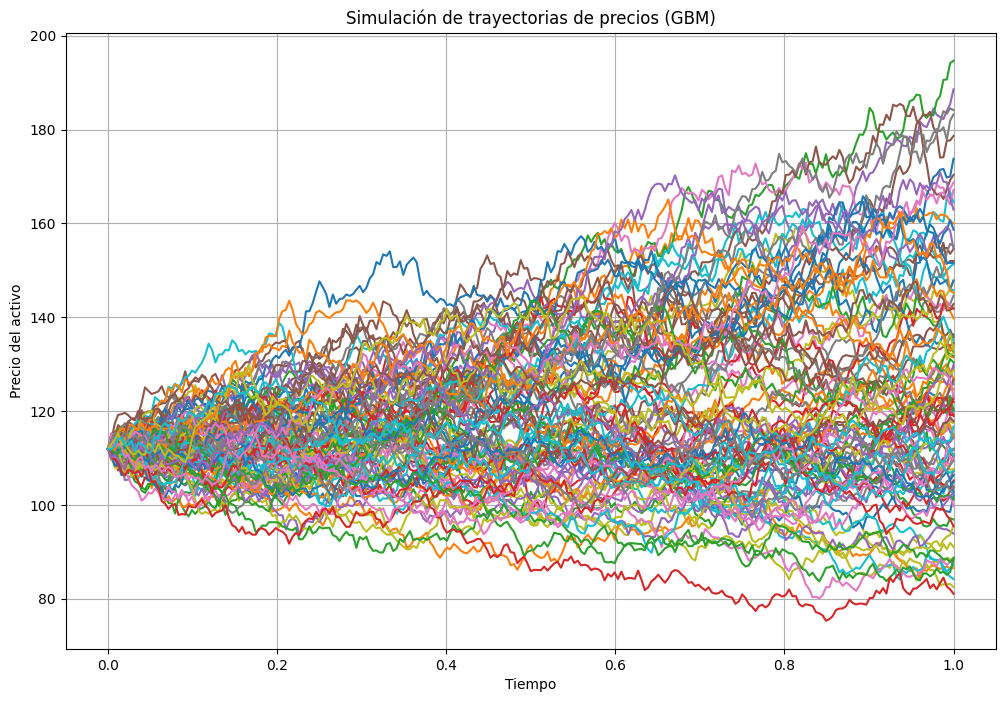

In [9]:
# Graficar algunas trayectorias simuladas
plt.figure(figsize=(12, 8))
for i in range(100):
    plt.plot(t, paths[i])
plt.title("Simulación de trayectorias de precios (GBM)")
plt.xlabel("Tiempo")
plt.ylabel("Precio del activo")
plt.grid(True)
plt.show()

In [ ]:
errores_put=[] #Lista para almacenar los errores de la opción put
valores_binarios=[] #Lista para almacenar los valores de los binarios

In [22]:
put_bs=Funciones.black_scholes_put(S0, K, T, r, sigma) #Valor de la opción put según Black-Scholes
print(f"Valor PUT (Black-Scholes): {put_bs:.4f}\n")

Valor PUT (Black-Scholes): 5.2444



In [ ]:
# Simulación de Monte Carlo para calcular el valor de la opción put y el binario
for n in n_iteraciones:
    valor_put=Funciones.valor_put(ST, K, T, r)  # Valor de la opción put
    valor_bin=Funciones.binaria_montecarlo(ST, K, T, r)  # Valor del binario

    errores=abs(valor_put - put_bs)  # Error absoluto
    errores_put.append(errores)  # Almacenar el error
    valores_binarios.append(valor_bin)  # Almacenar el valor del binario

    print(f"n = {n:6d} | Valor PUT MC: {valor_put:.4f} | Error: {errores:.4f} | Binaria: {valor_bin:.4f}")

n =    100 | Valor PUT MC: 7.2343 | Error: 1.9899 | Binaria: 0.4800
n =   1000 | Valor PUT MC: 5.6731 | Error: 0.4287 | Binaria: 0.3886
n =   5000 | Valor PUT MC: 5.3613 | Error: 0.1170 | Binaria: 0.3785
n =  10000 | Valor PUT MC: 5.2143 | Error: 0.0300 | Binaria: 0.3823
n =  50000 | Valor PUT MC: 5.2095 | Error: 0.0349 | Binaria: 0.3854
n = 100000 | Valor PUT MC: 5.2489 | Error: 0.0045 | Binaria: 0.3868


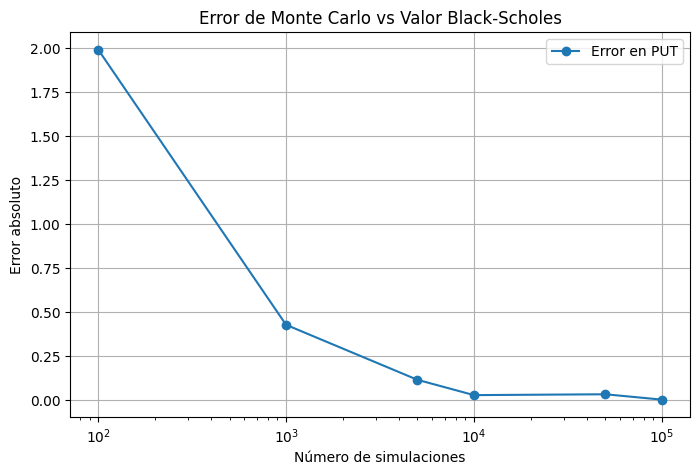

In [24]:
# Gráfica del error en función del número de simulaciones
plt.figure(figsize=(8,5))
plt.plot(n_iteraciones, errores_put, marker='o', label='Error en PUT')
plt.xscale('log')
plt.xlabel('Número de simulaciones')
plt.ylabel('Error absoluto')
plt.title('Error de Monte Carlo vs Valor Black-Scholes')
plt.grid(True)
plt.legend()
plt.show()